




# Energy Consumption Data Notebook 3: Data Visualizations and Finding Trends in Data


---

### Goals For This Notebook:

1 - Create scatter plots to visualize how energy consumption changes with certain factors.<br>

2 - Create lines of best fit to see how strong the correlation between chosen variables are.<br>

---

### Table of Contents

1 - [Creating Scatter Plots and Lines of Best Fit](#section1)<br>

2 - [Which Appliance's Power Consumption Is Most Affected By Temperature?](#section2)<br>

---

In this notebook, we will continue to work with our merged weather and power dataset to create more data visualizations. We will create scatter plots, which allow us to examine the relationship between two variables. In particular, we want to see how factors such as outdoor air temperature affect the energy consumption of the building and various appliances.

We will also create lines of best fit to visualize how strong the correlation between chosen variables are.

Let's first get started by importing the libraries we need:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Creating Scatter Plots and Lines of Best Fit <a id='section1'></a>

Refer to Energy Consumption Data Notebook 2 for this exercise. Import the merged weather and power dataset saved in the file `weather_and_power.csv` (in the *data* folder) into a dataframe called `weather_and_power`. Then remove the column named `Unnamed: 0`.

In [3]:
#EXERCISE - Import the data

weather_and_power = pd.read_csv("data/weather_and_power.csv")
weather_and_power.head()

,Unnamed: 0,Timestamp,outdoor air temperature (F),humidity,windspeed,cloudcover,solar irradiance on PV panels (Watt per m^2),building total power consumption (Watts),freezer power consumption (Watts),refrigerator power consumption (Watts),refrigerator fan power consumption (Watts),west air conditioning power consumption (Watts),east air conditioning power consumption (Watts),total power consumption (Watts),Better Timestamp,date,time,month,12-hr-time
0,0,2021-01-01 00:00:00,43.56,98.0,2.87,0.37,0.0,32533.332031,4083.540039,11.914492,43.354057,304.049896,944.930481,37921.120996,2021-01-01 00:00:00,2021-01-01,00:00:00,1,12:00am
1,1,2021-01-01 00:15:00,43.41,98.0,2.93,0.38,0.0,30975.056641,3969.495605,14.195988,43.110699,304.558319,958.440125,36264.857376,2021-01-01 00:15:00,2021-01-01,00:15:00,1,12:15am
2,2,2021-01-01 00:30:00,43.28,98.0,2.98,0.41,0.0,31915.005859,3835.891602,12.848112,253.175949,304.966461,1015.086365,37336.974348,2021-01-01 00:30:00,2021-01-01,00:30:00,1,12:30am
3,3,2021-01-01 00:45:00,43.35,98.0,3.00,0.44,0.0,30087.257812,357.424866,10.164385,43.093910,302.546539,957.893921,31758.381433,2021-01-01 00:45:00,2021-01-01,00:45:00,1,12:45am
4,4,2021-01-01 01:00:00,43.47,98.0,2.97,0.50,0.0,29074.365234,3796.636475,9.275864,42.858944,NaN,NaN,NaN,2021-01-01 01:00:00,2021-01-01,01:00:00,1,01:00am


In [4]:
#EXERCISE - Remove the column "Unnamed: 0"

# Your code here
weather_and_power.pop("Unnamed: 0")

weather_and_power.head()

,Timestamp,outdoor air temperature (F),humidity,windspeed,cloudcover,solar irradiance on PV panels (Watt per m^2),building total power consumption (Watts),freezer power consumption (Watts),refrigerator power consumption (Watts),refrigerator fan power consumption (Watts),west air conditioning power consumption (Watts),east air conditioning power consumption (Watts),total power consumption (Watts),Better Timestamp,date,time,month,12-hr-time
0,2021-01-01 00:00:00,43.56,98.0,2.87,0.37,0.0,32533.332031,4083.540039,11.914492,43.354057,304.049896,944.930481,37921.120996,2021-01-01 00:00:00,2021-01-01,00:00:00,1,12:00am
1,2021-01-01 00:15:00,43.41,98.0,2.93,0.38,0.0,30975.056641,3969.495605,14.195988,43.110699,304.558319,958.440125,36264.857376,2021-01-01 00:15:00,2021-01-01,00:15:00,1,12:15am
2,2021-01-01 00:30:00,43.28,98.0,2.98,0.41,0.0,31915.005859,3835.891602,12.848112,253.175949,304.966461,1015.086365,37336.974348,2021-01-01 00:30:00,2021-01-01,00:30:00,1,12:30am
3,2021-01-01 00:45:00,43.35,98.0,3.00,0.44,0.0,30087.257812,357.424866,10.164385,43.093910,302.546539,957.893921,31758.381433,2021-01-01 00:45:00,2021-01-01,00:45:00,1,12:45am
4,2021-01-01 01:00:00,43.47,98.0,2.97,0.50,0.0,29074.365234,3796.636475,9.275864,42.858944,NaN,NaN,NaN,2021-01-01 01:00:00,2021-01-01,01:00:00,1,01:00am


Let's review how to create a scatter plot using matplotlib. In the cell below, make a scatter plot that compares the total power consumption to the building total power consumption.

**Before you create the scatter plot, what sort of correlation do you expect? *(Positive, negative, or none?)* Why? Write your answer and reasoning below:**

*Your answer here*

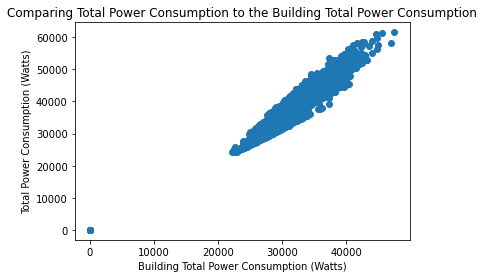

In [5]:
# EXERCISE

x_data = weather_and_power["building total power consumption (Watts)"]
y_data = weather_and_power["total power consumption (Watts)"]

plt.title('Comparing Total Power Consumption to the Building Total Power Consumption')
plt.xlabel('Building Total Power Consumption (Watts)')
plt.ylabel('Total Power Consumption (Watts)')
plt.scatter(x_data, y_data);

Notice how when we do that, we seem to see almost a perfect positive correlation between total energy consumption and building total consumption (was this what you expected?). 

However, there are a few points with values of 0 that are making it harder to see the relationship.

Let's drop the rows where total power consumption OR building total power consumption are zero. We will use boolean indexing (refer to notebook 07: pandas dataframes) to first find the rows that match this criteria and save it into a filter.

In [6]:
# EXERCISE
# Use boolean indexing to find rows where the total power consumption OR the building total power consumption are zero
# We will save this into a filter "zero_power_filter"

zero_power_filter = weather_and_power[(weather_and_power["total power consumption (Watts)"]==0) | 
                 (weather_and_power["building total power consumption (Watts)"]==0)]

Next step is to remove the rows. As we are working with rows, not columns as before, we will use the `drop()` function and feed it our filter. We must attach `.index` to our filter name so we tell the `drop()` function the index of the rows it needs to drop. We will also use the argument `inplace = True` so we drop the rows from the original dataframe instead of creating a new dataframe.

In [7]:
# Run this cell to remove those rows!
weather_and_power.drop(zero_power_filter.index, inplace = True)

weather_and_power.head()

,Timestamp,outdoor air temperature (F),humidity,windspeed,cloudcover,solar irradiance on PV panels (Watt per m^2),building total power consumption (Watts),freezer power consumption (Watts),refrigerator power consumption (Watts),refrigerator fan power consumption (Watts),west air conditioning power consumption (Watts),east air conditioning power consumption (Watts),total power consumption (Watts),Better Timestamp,date,time,month,12-hr-time
0,2021-01-01 00:00:00,43.56,98.0,2.87,0.37,0.0,32533.332031,4083.540039,11.914492,43.354057,304.049896,944.930481,37921.120996,2021-01-01 00:00:00,2021-01-01,00:00:00,1,12:00am
1,2021-01-01 00:15:00,43.41,98.0,2.93,0.38,0.0,30975.056641,3969.495605,14.195988,43.110699,304.558319,958.440125,36264.857376,2021-01-01 00:15:00,2021-01-01,00:15:00,1,12:15am
2,2021-01-01 00:30:00,43.28,98.0,2.98,0.41,0.0,31915.005859,3835.891602,12.848112,253.175949,304.966461,1015.086365,37336.974348,2021-01-01 00:30:00,2021-01-01,00:30:00,1,12:30am
3,2021-01-01 00:45:00,43.35,98.0,3.00,0.44,0.0,30087.257812,357.424866,10.164385,43.093910,302.546539,957.893921,31758.381433,2021-01-01 00:45:00,2021-01-01,00:45:00,1,12:45am
4,2021-01-01 01:00:00,43.47,98.0,2.97,0.50,0.0,29074.365234,3796.636475,9.275864,42.858944,NaN,NaN,NaN,2021-01-01 01:00:00,2021-01-01,01:00:00,1,01:00am


Let's create the same scatter plot again, this time with our 0 values removed:

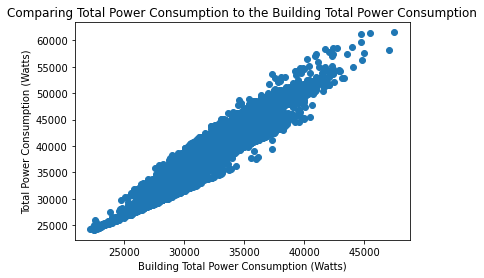

In [8]:
# EXERCISE

x_data = weather_and_power["building total power consumption (Watts)"]
y_data = weather_and_power["total power consumption (Watts)"]

plt.title('Comparing Total Power Consumption to the Building Total Power Consumption')
plt.xlabel('Building Total Power Consumption (Watts)')
plt.ylabel('Total Power Consumption (Watts)')
plt.scatter(x_data, y_data);

In order to better visualize the correlation, let's add a line of best fit. However, before we do this, we need to remove all the null values from the data so our functions fo creating the line of best fit works.

First, let's see if we have any null values (refer to notebook 07 pandas dataframes, section 1.6):

In [9]:
#EXERCISE - Check if there are any null values

weather_and_power.isnull().sum()

Timestamp                                             0
outdoor air temperature (F)                        1705
humidity                                           1705
windspeed                                          1705
cloudcover                                         1705
solar irradiance on PV panels (Watt per m^2)       1705
building total power consumption (Watts)           3212
freezer power consumption (Watts)                  3185
refrigerator power consumption (Watts)             3196
refrigerator fan power consumption (Watts)         3181
west air conditioning power consumption (Watts)    3186
east air conditioning power consumption (Watts)    3230
total power consumption (Watts)                    4411
Better Timestamp                                      0
date                                                  0
time                                                  0
month                                                 0
12-hr-time                                      

There are plenty! We will use the function `.dropna()` which will remove all the rows that contain null values. Again, we will use the argument `inplace = True` so we drop the rows from the original dataframe instead of creating a new dataframe. Make sure to check if we successfully removed the null values:

In [10]:
weather_and_power.dropna(inplace=True)

#EXERCISE - Check again to see if there are any null values left:
weather_and_power.isnull().sum()

Timestamp                                          0
outdoor air temperature (F)                        0
humidity                                           0
windspeed                                          0
cloudcover                                         0
solar irradiance on PV panels (Watt per m^2)       0
building total power consumption (Watts)           0
freezer power consumption (Watts)                  0
refrigerator power consumption (Watts)             0
refrigerator fan power consumption (Watts)         0
west air conditioning power consumption (Watts)    0
east air conditioning power consumption (Watts)    0
total power consumption (Watts)                    0
Better Timestamp                                   0
date                                               0
time                                               0
month                                              0
12-hr-time                                         0
dtype: int64

Now let's create our model using the function `polyfit()` from the numpy library. `polyfit()` takes in your x and y data values. We also put in the argument '1' to indicate we are working with a linear model.

We will also use the function `poly1d()` from the numpy library. This allows us to visualize the best-fit line in the format we are familiar with, y = mx + b, where m is the slope and b is the y-intercept. `poly1d()` also allows us to easily plot it over our scatter plot from before.

In [11]:
#We are still working with building total power consumption and total power consumption:
x_data = weather_and_power["building total power consumption (Watts)"]
y_data = weather_and_power["total power consumption (Watts)"]

#Creating the model
model = np.polyfit(x_data, y_data, 1)
model_function = np.poly1d(model)
print(model_function)

 
1.525 x - 1.053e+04


Let's now look at our scatter plot and line of best fit together! In the cell below, copy and paste your code for creating the scatter plot. On the line below, create the line of best fit.

When plotting the line of best fit, notice that you use the model function applied to the x data for your y values.

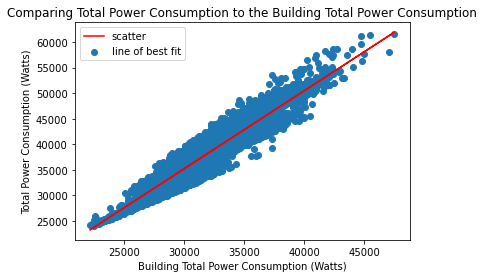

In [12]:
# EXERCISE - Create your scatter plot with the line of best fit

#Copy your code to create the scatter plot here:
x_data = weather_and_power["building total power consumption (Watts)"]
y_data = weather_and_power["total power consumption (Watts)"]

plt.title('Comparing Total Power Consumption to the Building Total Power Consumption')
plt.xlabel('Building Total Power Consumption (Watts)')
plt.ylabel('Total Power Consumption (Watts)')
plt.scatter(x_data, y_data);


#Create the line of best fit
plt.plot(x_data, model_function(x_data), 'red')

#Create a legend
plt.legend(['scatter', 'line of best fit']);

With the line of best fit, it's even more clear that there is a clear, positive relationship between the total power consumption and building power consumption.

However, we can quantify how good the line of best fit is by finding the R<sup>2</sup> (coefficient of determination) value. The closer R<sup>2</sup> is to 1, the better the fit.

To do this, we'll use a new library, `scikit-learn` (which is actually the [machine learning library](https://scikit-learn.org/stable/) for Python!) There's a function that easily allows us to calculate R<sup>2</sup>, called `r2_score()`. The arguments it takes is our original y data values and the model's y data values:

In [13]:
from sklearn.metrics import r2_score

r2_score(y_data, model_function(x_data))

0.8971094456876594

Now we are going to analyze a different relationship. We are going to look at total power consumption compared to the outdoor temperature. When do you think the most power is consumed? Keep in mind the only months we are looking at are January, February, March, and April.

**In this cell, write your hypothesis**

*Your answer here*

Let's test your hypothesis. First, create a scatter plot comparing outdoor air temperature to total power consumption. Put the temperature on the x-axis and total energy consumption on the y-axis.

*Hint: You can always call .columns to refresh your memory on the name of the columns. Create a new code cell below if you would like to do that.*

In [14]:
weather_and_power.columns

Index(['Timestamp', 'outdoor air temperature (F)', 'humidity', 'windspeed',
       'cloudcover', 'solar irradiance on PV panels (Watt per m^2)',
       'building total power consumption (Watts)',
       'freezer power consumption (Watts)',
       'refrigerator power consumption (Watts)',
       'refrigerator fan power consumption (Watts)',
       'west air conditioning power consumption (Watts)',
       'east air conditioning power consumption (Watts)',
       'total power consumption (Watts)', 'Better Timestamp', 'date', 'time',
       'month', '12-hr-time'],
      dtype='object')

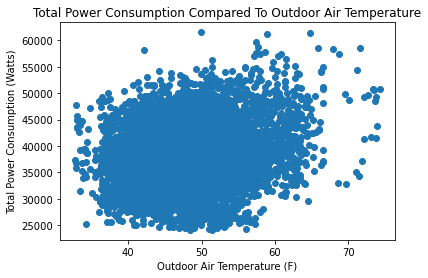

In [15]:
# EXERCISE - Create a scatter plot comparing outdoor air temperature and total power consumption

x_data = weather_and_power["outdoor air temperature (F)"]
y_data = weather_and_power["total power consumption (Watts)"]

plt.title('Total Power Consumption Compared To Outdoor Air Temperature')
plt.xlabel('Outdoor Air Temperature (F)')
plt.ylabel('Total Power Consumption (Watts)')
plt.scatter(x_data, y_data);

Copy your code from before to create your linear model:

In [16]:
#EXERCISE - Create the best-fit line
model = np.polyfit(x_data, y_data, 1)
model_function = np.poly1d(model)
print(model_function)

 
160.8 x + 3.04e+04


In the cell below, create a scatter plot with the line of best fit. Start by copying and pasting your earlier code.

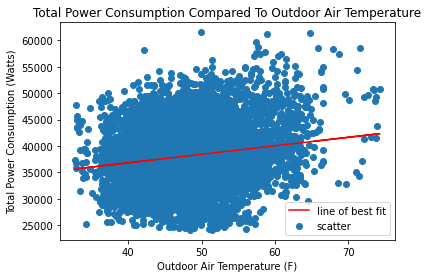

In [17]:
# EXERCISE - Create your scatter plot with the line of best fit

#Copy your code to create the scatter plot here:
x_data = weather_and_power["outdoor air temperature (F)"]
y_data = weather_and_power["total power consumption (Watts)"]

plt.title('Total Power Consumption Compared To Outdoor Air Temperature')
plt.xlabel('Outdoor Air Temperature (F)')
plt.ylabel('Total Power Consumption (Watts)')
plt.scatter(x_data, y_data);


#Create the line of best fit
plt.plot(x_data, model_function(x_data), 'red')

#Create a legend
plt.legend(['line of best fit', 'scatter']);

Let's quantify how good the line of best fit is by finding the R<sup>2</sup> value. Remember, the closer R<sup>2</sup> is to 1, the better the fit.

In [18]:
#EXERCISE - find R^2

r2_score(y_data, model_function(x_data))

0.030181634528921197

### Answer the following questions:

Is there a positive, negative, or no correlation between the total power consumption and outdoor air temperature? How can you tell? Does this match your hypothesis?

*Your answer here*

**Key: Positive - we can tell by the (slight) positive slope of the best-fit line.**

How strong of a relationship is there between the total power consumption and the outdoor air temperature? How can you tell?

*Your answer here*

**Key: It is not as strong, as the R^2 value is around 0.03 (not very close to 1).**

What are some suggestions to investigate further the correlation between the total power consumption and outdoor air temperature?

*Your answer here*

**Key: Note that the data was only taken January through April. More data from different months could give a wider range of temperatures to investigate with.**

## 2. Which Appliance's Power Consumption Is Most Affected By Temperature?<a id='section2'>

We have data for power consumption of five different appliances: freezer, refrigerator, refrigerator fan, west AC, and east AC.

Let's investigate which appliance's power consumption is most affected by temperature. We will do this by creating a scatter plot including the line of best fit for each of the five appliances. We will also look at the R<sup>2</sup> value.

Before we start, let's make a hypothesis. **Of the five appliances, which do you think is most strongly correlated with the temperature? Why?**

*Your answer here*

In [19]:
#Let's again remind ourselves of the names of the columns:
weather_and_power.columns

Index(['Timestamp', 'outdoor air temperature (F)', 'humidity', 'windspeed',
       'cloudcover', 'solar irradiance on PV panels (Watt per m^2)',
       'building total power consumption (Watts)',
       'freezer power consumption (Watts)',
       'refrigerator power consumption (Watts)',
       'refrigerator fan power consumption (Watts)',
       'west air conditioning power consumption (Watts)',
       'east air conditioning power consumption (Watts)',
       'total power consumption (Watts)', 'Better Timestamp', 'date', 'time',
       'month', '12-hr-time'],
      dtype='object')

As will be plotting the power consumption of each of the appliances over the outdoor air temperature, the data on the x axis for all the plots will be outdoor air temperature. Let's go ahead and create the `x_data` variable that we will use in all our plots:

In [20]:
#EXERCISE - Have the variable x data be the outdoor air temperature column from the weather_and_power dataframe

x_data = weather_and_power["outdoor air temperature (F)"]

For each of the appliances below, do the following:
1. Grab the appropriate column and save it in the y_data_*appliance name* variable
2. Use `polyfit()` and `poly1d()` to create your linear model (best-fit line)
3. Create a scatter plot with the best fit line
4. Find R<sup>2</sup>

Remember, to make your life easier, you can copy and paste code! Just make sure to rename variables, graph titles and labels appropriately.

### Freezer

In [21]:
#Grab the appropriate column and save it in y_data_freezer

y_data_freezer = weather_and_power["freezer power consumption (Watts)"]

In [22]:
#Create the linear model
model_freezer = np.polyfit(x_data, y_data_freezer, 1)
model_function_freezer = np.poly1d(model_freezer)
print(model_function_freezer)

 
42.64 x + 1091


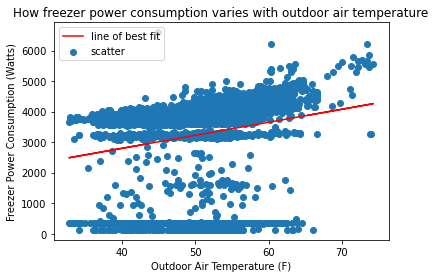

In [23]:
#Create the scatter plot with the best-fit line
plt.title("How freezer power consumption varies with outdoor air temperature")
plt.ylabel("Freezer Power Consumption (Watts)")
plt.xlabel("Outdoor Air Temperature (F)")
plt.scatter(x_data, y_data_freezer)

plt.plot(x_data,model_function_freezer(x_data), 'red')

plt.legend(['line of best fit', 'scatter']);

You might notice that your graph looks odd - there are some horizontal lines. These horizontal lines represent fan-only or compressor off mode, or regular "off states". If we want to find the correlation between the actual consumption and the outdoor air temperature, we will need to only use data when the freezer's power consumption is on.

To do that, let's create a filter where we only look at freezer power consumption data that is above 3400 Watts, then apply that filter to create a subset of x and y data that only fulfills the filter.

In [24]:
#Create our filters
freezer_filter = weather_and_power["freezer power consumption (Watts)"] > 3400

#Apply our filters
x_data_freezer_on = weather_and_power[freezer_filter]["outdoor air temperature (F)"]
y_data_freezer_on = weather_and_power[freezer_filter]["freezer power consumption (Watts)"]

Now recreate your model and scatter plot - you can copy code from before, but just make sure you are using the right variables!

In [25]:
#Create the linear model
model_freezer = np.polyfit(x_data_freezer_on, y_data_freezer_on, 1)
model_function_freezer = np.poly1d(model_freezer)
print(model_function_freezer)

 
29.14 x + 2489


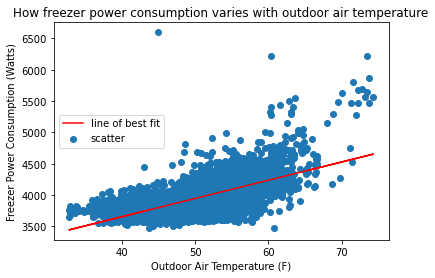

In [26]:
#Create the scatter plot with the best-fit line
plt.title("How freezer power consumption varies with outdoor air temperature")
plt.ylabel("Freezer Power Consumption (Watts)")
plt.xlabel("Outdoor Air Temperature (F)")
plt.scatter(x_data_freezer_on, y_data_freezer_on)

plt.plot(x_data_freezer_on,model_function_freezer(x_data_freezer_on), 'red')

plt.legend(['line of best fit', 'scatter']);

Now the scatter plot and linear model only uses the data when the freezer is on, and looks a bit more reasonable. Let's see what our R<sup>2</sup> returns:

In [27]:
#Find R^2

r2_score(y_data_freezer_on, model_function_freezer(x_data_freezer_on))

0.4497208130631587

Feel free to experiment with the filter to see if you can get a better fit!

### Refrigerator

In [28]:
#Grab the appropriate column and save it in y_data_refrigerator

y_data_refrigerator = weather_and_power["refrigerator power consumption (Watts)"]

In [29]:
#Create the linear model
model_refrigerator = np.polyfit(x_data, y_data_refrigerator, 1)
model_function_refrigerator = np.poly1d(model_refrigerator)
print(model_function_refrigerator)

 
13.36 x + 495


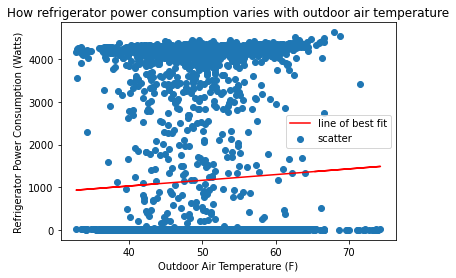

In [30]:
#Create the scatter plot with the best-fit line
plt.title("How refrigerator power consumption varies with outdoor air temperature")
plt.ylabel("Refrigerator Power Consumption (Watts)")
plt.xlabel("Outdoor Air Temperature (F)")
plt.scatter(x_data, y_data_refrigerator)

plt.plot(x_data,model_function_refrigerator(x_data), 'red')

plt.legend(['line of best fit', 'scatter']);

Similar to the freezer, create a filter that ignores the "off values" and then recreate the linear model and scatter plot. You may need to experiment with your filter to find the right cutting point for data.

In [31]:
#Create our filters
refrigerator_filter = weather_and_power["refrigerator power consumption (Watts)"] > 4200

#Apply our filters
x_data_refrigerator_on = weather_and_power[refrigerator_filter]["outdoor air temperature (F)"]
y_data_refrigerator_on = weather_and_power[refrigerator_filter]["refrigerator power consumption (Watts)"]

In [32]:
#Re-create the linear model
model_refrigerator = np.polyfit(x_data_refrigerator_on, y_data_refrigerator_on, 1)
model_function_refrigerator = np.poly1d(model_refrigerator)
print(model_function_refrigerator)

 
2.854 x + 4138


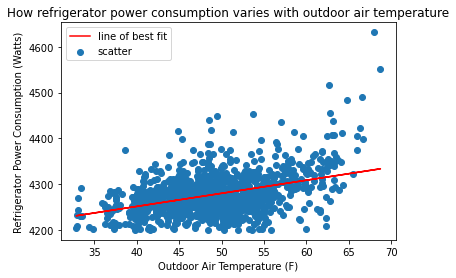

In [33]:
#Re-create the scatter plot with the best-fit line
plt.title("How refrigerator power consumption varies with outdoor air temperature")
plt.ylabel("Refrigerator Power Consumption (Watts)")
plt.xlabel("Outdoor Air Temperature (F)")
plt.scatter(x_data_refrigerator_on, y_data_refrigerator_on)

plt.plot(x_data_refrigerator_on,model_function_refrigerator(x_data_refrigerator_on), 'red')

plt.legend(['line of best fit', 'scatter']);

In [34]:
#Find R^2

r2_score(y_data_refrigerator_on, model_function_refrigerator(x_data_refrigerator_on))

0.16427693984861436

### Refrigerator Fan

In [35]:
#Grab the appropriate column and save it in y_data_refrigerator_fan

y_data_refrigerator_fan = weather_and_power["refrigerator fan power consumption (Watts)"]

In [36]:
#Create the linear model
model_refrigerator_fan = np.polyfit(x_data, y_data_refrigerator_fan, 1)
model_function_refrigerator_fan = np.poly1d(model_refrigerator_fan)
print(model_function_refrigerator_fan)

 
1.441 x + 200.3


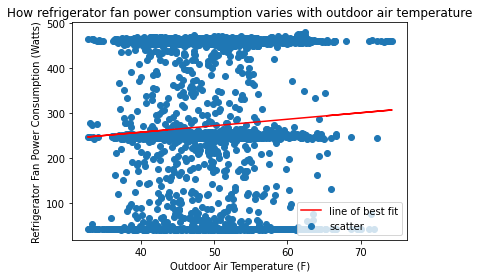

In [37]:
#Create the scatter plot with the best-fit line
plt.title("How refrigerator fan power consumption varies with outdoor air temperature")
plt.ylabel("Refrigerator Fan Power Consumption (Watts)")
plt.xlabel("Outdoor Air Temperature (F)")
plt.scatter(x_data, y_data_refrigerator_fan)

plt.plot(x_data, model_function_refrigerator_fan(x_data), 'red')

plt.legend(['line of best fit', 'scatter']);

This time, you might notice that there are three clusters of data close together that almost seems to form horizontal lines. You should create a filter, but it will be interesting to experiment which data cluster to focus on.

In [38]:
#Create our filters
#Below is an example of just looking at the top cluster of horizontal data points
refrigerator_fan_filter = weather_and_power["refrigerator fan power consumption (Watts)"] > 450

#Below is an example of looking just at the middle cluster of horizontal data points
#refrigerator_fan_filter = (weather_and_power["refrigerator fan power consumption (Watts)"] < 270) & (weather_and_power["refrigerator fan power consumption (Watts)"] > 240)

#Apply our filters
x_data_refrigerator_fan_on = weather_and_power[refrigerator_fan_filter]["outdoor air temperature (F)"]
y_data_refrigerator_fan_on = weather_and_power[refrigerator_fan_filter]["refrigerator fan power consumption (Watts)"]

In [39]:
#Re-create the linear model
model_refrigerator_fan = np.polyfit(x_data_refrigerator_fan_on, y_data_refrigerator_fan_on, 1)
model_function_refrigerator_fan = np.poly1d(model_refrigerator_fan)
print(model_function_refrigerator_fan)

 
-0.001083 x + 460.2


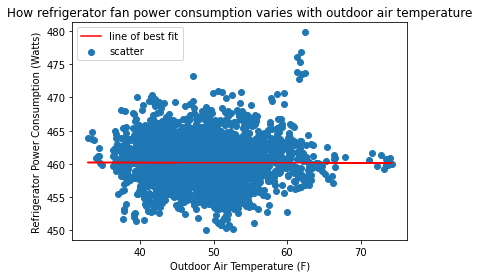

In [40]:
#Re-create the scatter plot with the best-fit line
plt.title("How refrigerator fan power consumption varies with outdoor air temperature")
plt.ylabel("Refrigerator Power Consumption (Watts)")
plt.xlabel("Outdoor Air Temperature (F)")
plt.scatter(x_data_refrigerator_fan_on, y_data_refrigerator_fan_on)

plt.plot(x_data_refrigerator_fan_on,model_function_refrigerator_fan(x_data_refrigerator_fan_on), 'red')

plt.legend(['line of best fit', 'scatter']);

In [41]:
#Find R^2

r2_score(y_data_refrigerator_fan_on, model_function_refrigerator_fan(x_data_refrigerator_fan_on))

3.4613705713892884e-06

### West Air Conditioning

In [42]:
#Grab the appropriate column and save it in y_data_west_ac

y_data_west_ac = weather_and_power["west air conditioning power consumption (Watts)"]

In [43]:
#Create the linear model
model_west_ac = np.polyfit(x_data, y_data_west_ac, 1)
model_function_west_ac = np.poly1d(model_west_ac)
print(model_function_west_ac)

 
28.91 x - 901.9


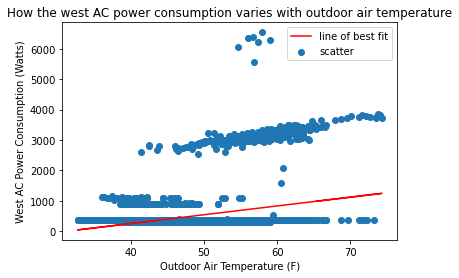

In [44]:
#Create the scatter plot with the best-fit line
plt.title("How the west AC power consumption varies with outdoor air temperature")
plt.ylabel("West AC Power Consumption (Watts)")
plt.xlabel("Outdoor Air Temperature (F)")
plt.scatter(x_data, y_data_west_ac)

plt.plot(x_data, model_function_west_ac(x_data), 'red')

plt.legend(['line of best fit', 'scatter']);

The west air conditioning system has three different modes of operation: fan-only, 1-stage, 2-stage. Fan-only is when the compressor is off and there is just ventilation happening, 1-stage is the first stage of cooling and 2-stage is what turns on when 1-stage isn't sufficient for cooling.

Try to filter out your data to just focus on 2-stage. Note that there are some interesting data points around 6000W - according to resesarchers who conducted this study, these are anomalies and should be ignored for now.

In [45]:
#Create our filters
west_ac_filter = (weather_and_power["west air conditioning power consumption (Watts)"] < 4000) & (weather_and_power["west air conditioning power consumption (Watts)"] > 2000)

#Apply our filters
x_data_west_ac_on = weather_and_power[west_ac_filter]["outdoor air temperature (F)"]
y_data_west_ac_on = weather_and_power[west_ac_filter]["west air conditioning power consumption (Watts)"]

In [46]:
#Re-create the linear model
model_west_ac = np.polyfit(x_data_west_ac_on, y_data_west_ac_on, 1)
model_function_west_ac = np.poly1d(model_west_ac)
print(model_function_west_ac)

 
34.75 x + 1134


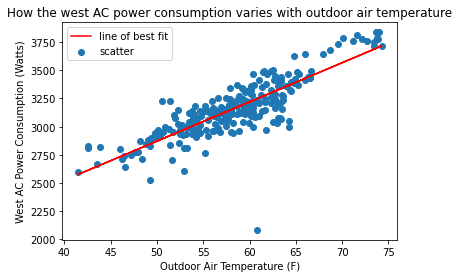

In [47]:
#Re-create the scatter plot with the best-fit line
plt.title("How the west AC power consumption varies with outdoor air temperature")
plt.ylabel("West AC Power Consumption (Watts)")
plt.xlabel("Outdoor Air Temperature (F)")
plt.scatter(x_data_west_ac_on, y_data_west_ac_on)

plt.plot(x_data_west_ac_on, model_function_west_ac(x_data_west_ac_on), 'red')

plt.legend(['line of best fit', 'scatter']);

In [48]:
#Find R^2

r2_score(y_data_west_ac_on, model_function_west_ac(x_data_west_ac_on))

0.696788851489218

### East Air Conditioning

In [49]:
#Grab the appropriate column and save it in y_data_east_ac

y_data_east_ac = weather_and_power["east air conditioning power consumption (Watts)"]

In [50]:
#Create the linear model
model_east_ac = np.polyfit(x_data, y_data_east_ac, 1)
model_function_east_ac = np.poly1d(model_east_ac)
print(model_function_east_ac)

 
36.94 x - 599.7


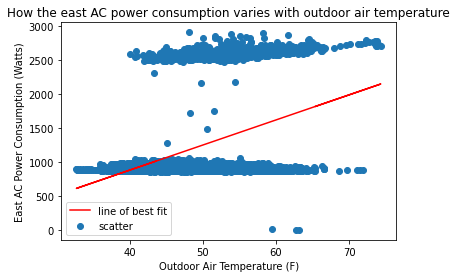

In [51]:
#Create the scatter plot with the best-fit line
plt.title("How the east AC power consumption varies with outdoor air temperature")
plt.ylabel("East AC Power Consumption (Watts)")
plt.xlabel("Outdoor Air Temperature (F)")
plt.scatter(x_data, y_data_east_ac)

plt.plot(x_data, model_function_east_ac(x_data), 'red')

plt.legend(['line of best fit', 'scatter']);

The east air conditioning system also has three different modes of operation (fan-only, 1-stage, 2-stage) like the west air conditioning system; however, it turns out that the east air conditioning system was constantly running and never in fan-only mode. The scatter plot shows data points for 1-stage and 2-stage.

Try to filter out your data to just focus on 2-stage.

In [52]:
#Create our filters
east_ac_filter = weather_and_power["east air conditioning power consumption (Watts)"] > 2400

#Apply our filters
x_data_east_ac_on = weather_and_power[east_ac_filter]["outdoor air temperature (F)"]
y_data_east_ac_on = weather_and_power[east_ac_filter]["east air conditioning power consumption (Watts)"]

In [53]:
#Re-create the linear model
model_east_ac = np.polyfit(x_data_east_ac_on, y_data_east_ac_on, 1)
model_function_east_ac = np.poly1d(model_east_ac)
print(model_function_east_ac)

 
5.906 x + 2280


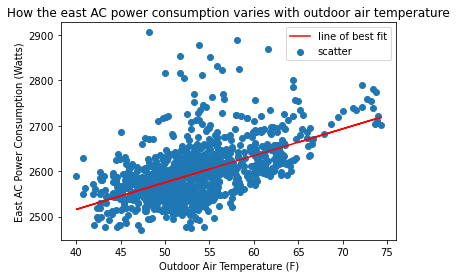

In [54]:
#Re-create the scatter plot with the best-fit line
plt.title("How the east AC power consumption varies with outdoor air temperature")
plt.ylabel("East AC Power Consumption (Watts)")
plt.xlabel("Outdoor Air Temperature (F)")
plt.scatter(x_data_east_ac_on, y_data_east_ac_on)

plt.plot(x_data_east_ac_on, model_function_east_ac(x_data_east_ac_on), 'red')

plt.legend(['line of best fit', 'scatter']);

In [55]:
#Find R^2

r2_score(y_data_east_ac_on, model_function_east_ac(x_data_east_ac_on))

0.28397958119006406

### Putting it all together

Revisit your hypothesis. Was your hypothesis correct/incorrect? How can you tell? Make sure to use the scatter plots with your linear models and the R<sup>2</sup> value as evidence in your answer.

*Type your answer here*

Notebook developed by: Rachel McCarty, Kseniya Usovich, Laurel Hales, Alisa Bettale